In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# all the evaluation part is present in metrics

In [50]:
# Create a DataFrame with 'studyhours' and 'examcourse' columns

# data = {
#     'studyhours': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
#     'examcourse': [50, 55, 65, 70, 72, 80, 85, 87, 90, 95]
# }
# df = pd.DataFrame(data)
# df

In [51]:
# data = {'studyhours': [2,1,2,3,4,1,2,2,1,3],
#         'examcourse': ['python', 'DS','HTML', 'CSS', 'JS', 'ML','Programming','SQL','PowerBi','Oops']}
# df = pd.DataFrame(data)
# df

In [52]:
# # Create a DataFrame with 10 values in each column
# df = pd.DataFrame({'Studyhours': list(range(1, 11)), 'ExamScore': list(range(10, 110, 10))})
# df.head()

In [53]:
# Create a DataFrame with 10 values in each column
# df = pd.DataFrame({'Temperature': [20,22,25,27,30,32,35,37,40], 'Icecream_Sales': [200,250,300,330,370,400,460,500,550]})
# df.head()

In [54]:
df = pd.read_csv('Student_Performance.csv')
# df = df.reset_index(drop=True)
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [55]:
# x = df.drop('Performance Index',axis=1)

In [56]:
x = df.drop('Performance Index',axis=1)
y = df['Performance Index']

# x is independent - studyhours, x always should be 2D
# df['Studyhours'] -- this will not work, it accepts only 2D 
# df['ExamScore'] - this y axis takes 1D array

In [57]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8, random_state= 42)
# if we pass y first, it takes y as x, so always pass x first
# it will take 80% train and automatically it will take 20% data for test
# multivalued data a,b,c = 10,20,30 : right side is tuple which assigns values to left side
# random_state - to make the values stop from changing, otherwise the output keep on changing
# random_state= 42 - most used
# xtrain,xtest,ytrain,ytest - it should be in order because right side it returns first xtrain then xtest then ytrain then ytest

# train_test_split(x,y,test_size=0.2, random_state= 42)
# it will return test value as 20% first and remaining it will take as train

In [58]:
train_test_split(x,y,test_size=0.2, random_state= 42)

[      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
 9254              5               49                           0            7   
 1561              2               48                           1            7   
 1670              2               81                           0            7   
 6087              2               46                           0            6   
 6669              8               47                           0            9   
 ...             ...              ...                         ...          ...   
 5734              8               50                           1            6   
 5191              4               68                           0            9   
 5390              9               48                           0            7   
 860               1               47                           0            9   
 7270              2               46                           0            6   
 
       Sample 

In [59]:
model = LinearRegression()  #model creation
# This line creates an object (or instance) of the LinearRegression class from sklearn.linear_model.

In [60]:
# fit or train the model
model.fit(xtrain,ytrain)      

# if the box shows means model is trained successfully

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [70]:
if model.intercept_ < 0:
    model.intercept_ = 0

model.intercept_

# if its minus values we can add condition saying put 0 if minus values

0

In [62]:
model.coef_
# if student studies one more hour, the marks will increase by 10 every hour

array([2.85248393, 1.0169882 , 0.60861668, 0.47694148, 0.19183144])

In [63]:
ypred = model.predict(xtest) 
ypred
# in y = mx +c formula only x is there so only pass xtest

array([88.63380013, 56.53745916, 81.82509093, ..., 50.71536577,
       97.2652199 , 79.86456923], shape=(2000,))

In [64]:
ytest-ypred

6252   -37.633800
4684   -36.537459
1731   -35.825091
4742   -37.211714
4521   -35.926517
          ...    
6412   -35.808226
8285   -30.619971
7853   -34.715366
1095   -32.265220
6929   -32.864569
Name: Performance Index, Length: 2000, dtype: float64

In [65]:
r2_score(ytest,ypred)

-2.1307083601807673

In [66]:
model.score(xtest,ytest)

-2.1307083601807673

In [67]:
mean_squared_error(ytest,ypred)

1160.1939208197596

In [68]:
mean_absolute_error(ytest,ypred)

34.00173021933585

ValueError: x and y must be the same size

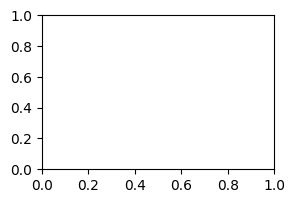

In [69]:
plt.figure(figsize=(3, 2))
plt.scatter(xtest,ytest)

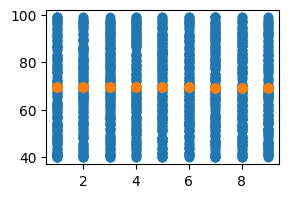

In [ ]:
plt.figure(figsize=(3, 2))
plt.scatter(xtest,ytest)
plt.scatter(xtest,ypred)

Conclusion : error difference is 0, model performance good